In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


#### CourseReviews

In [3]:
course_reviews = pd.read_pickle('Data/Preproccessed Data/course_reviews.pkl')

In [4]:
course_reviews.head()

,course_id,created_date,rating,text
0,8082,2019-04-20 16:54:16,4.5,NaN
1,8082,2019-04-19 06:00:18,5.0,NaN
2,8082,2019-04-01 18:15:31,5.0,NaN
3,8082,2019-03-28 15:04:02,3.5,Editing my review as I go through the lessons....
4,8082,2019-02-21 14:34:18,5.0,NaN


**Reviews Distribution :**

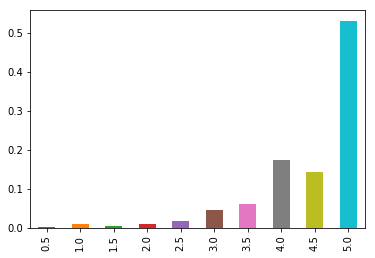

In [5]:
fig, ax = plt.subplots()
course_reviews['rating'].value_counts(1).sort_index().plot(ax=ax, kind='bar')

In [6]:
# ratings = 5
course_reviews.rating.eq(5).sum()/course_reviews.shape[0]

0.5317124196254224

In [7]:
# ratings >= 4
course_reviews.rating.ge(4).sum()/course_reviews.shape[0]

0.8487048676273913

 We can see that **most reviews are positive** with 53% being 5 stars, 85% of reviews are 4 stars or higher.

** ==> ** We now compare ratings with text against ratings without : 

While mostly favorable reviews are given, bad reviews are less abundant : a user is more willing to reviews if he has a good opinion about the course. **Hypothesis**  But do users who take time to write constructuve reviews tends to be less  appreciative of the course ?


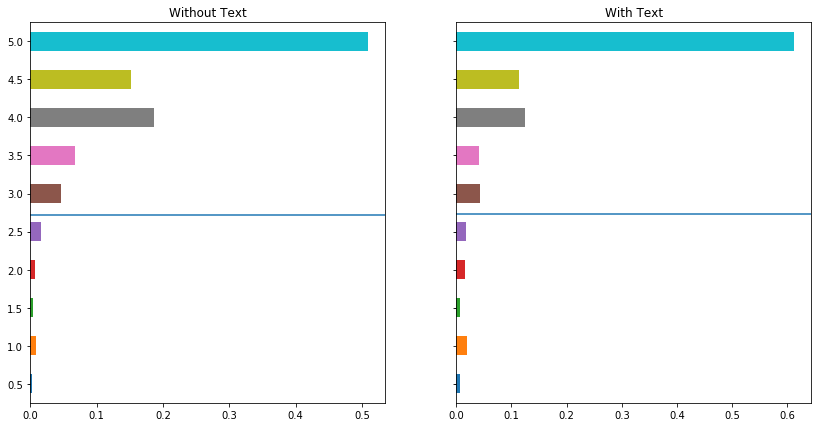

In [8]:
fig, ax = plt.subplots(1,2, sharey=True)

# set title
ax[0].set_title('Without Text')
ax[1].set_title('With Text')

# set mean line
ax[0].axhline(course_reviews[ course_reviews['text'].isna()]['rating'].mean())
ax[1].axhline(course_reviews[~course_reviews['text'].isna()]['rating'].mean())

# plot
course_reviews[ course_reviews['text'].isna()]['rating'].value_counts(1).sort_index().plot(ax=ax[0], kind='barh', figsize=(14,7))
course_reviews[~course_reviews['text'].isna()]['rating'].value_counts(1).sort_index().plot(ax=ax[1], kind='barh', figsize=(14,7))


We can study sentiments in textual reviews. 
To do so,  we 'll be using the [Vader model](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f), which a pretrained NLP model from the [nltk package](https://www.nltk.org/_modules/nltk/sentiment/vader.html) .

In [9]:
analyser = SentimentIntensityAnalyzer()

In [10]:
course_reviews['positiv']= course_reviews['text'].progress_apply(lambda x : x if pd.isna(x) else analyser.polarity_scores(x).get('pos'))

A Jupyter Widget

In [11]:
course_reviews['neutral']= course_reviews['text'].progress_apply(lambda x : x if pd.isna(x) else analyser.polarity_scores(x).get('neu'))

A Jupyter Widget

In [12]:
course_reviews['negativ']= course_reviews['text'].progress_apply(lambda x : x if pd.isna(x) else analyser.polarity_scores(x).get('neg'))

A Jupyter Widget

In [13]:
course_reviews['compound']= course_reviews['text'].progress_apply(lambda x : x if pd.isna(x) else analyser.polarity_scores(x).get('compound'))

A Jupyter Widget

In [14]:
course_reviews['sentiment'] = course_reviews.apply(lambda row : np.nan if np.isnan(row['compound']) else ('Neutral' if row['neutral']>.9 else ('Positiv' if row['positiv']>row['negativ'] else 'Negativ')), axis =1)

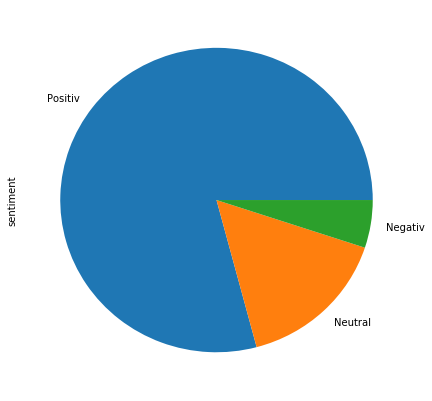

In [15]:
course_reviews['sentiment'].value_counts().plot.pie(figsize=(7,7))

**Result**

Looking at the ditribution of commented vs uncommented ratings, we see that both groups have routhly the same distribution and mean.

The sentiment analysis showed that uncommented ratings are largely positive

**The hypothesis stated above appear to be incorrect.**